# Measuring Threshold Based Data Reduction along three dimensional dataset
## Setting sufficient imports

In [3]:
#numpy
import numpy as np
#matplotlib
from matplotlib import pyplot as plt
#sklearn
from sklearn.metrics import mean_squared_error
#pandas
import pandas as pd

## Reading dataset
### This is where we read the dataset from csv file. Now we are reading all of the data measurements (PM10, PM25 and NO2).

In [4]:
dataset = pd.read_csv("merenja_karpos.csv")
print(dataset)

               time      PM10      PM25      NO2
0     2/3/2019 1:00  114.1680   76.6211  18.4716
1     2/3/2019 2:00   99.1302   65.8865  16.4128
2     2/3/2019 3:00   84.9147   54.8745  14.6268
3     2/3/2019 4:00   79.4718   52.0033  12.8137
4     2/3/2019 5:00   85.2981   57.4825  11.8227
..              ...       ...       ...      ...
164  2/9/2019 21:00  123.7630   84.3536  32.3430
165  2/9/2019 22:00  109.7020   72.5397  28.5877
166  2/9/2019 23:00  113.1560   74.7292  25.5491
167  2/10/2019 0:00  104.8180   71.1300  23.5415
168  2/10/2019 1:00  154.5710  107.0370  22.6117

[169 rows x 4 columns]


## Moving Average
### Calculating MA with window of 1, 2 and 3 and a test moving average of window 20 for analyzing purposes

In [6]:
#window 1
moving_average_one = dataset.rolling(1).mean()
#window 2
moving_average_two = dataset.rolling(2).mean()
#window 3
moving_average_three = dataset.rolling(3).mean()
#window 20
moving_average_test = dataset.rolling(20).mean()

### filling Nan values in dataset
moving_average_two.fillna(0, inplace=True)
moving_average_three.fillna(0, inplace=True)
moving_average_test.fillna(0, inplace=True)

print("MA(1):\n", moving_average_one.head(10))
print("MA(2):\n", moving_average_two[1:].head(10))
print("MA(3):\n", moving_average_three[2:].head(10))
print("MA(20):\n", moving_average_test[20:].head(10))

MA(1):
        PM10     PM25      NO2
0  114.1680  76.6211  18.4716
1   99.1302  65.8865  16.4128
2   84.9147  54.8745  14.6268
3   79.4718  52.0033  12.8137
4   85.2981  57.4825  11.8227
5   94.5229  63.8613  11.7907
6  117.9750  78.8359  12.5799
7  121.7980  80.9945  11.9556
8  102.0870  70.9779  12.8577
9   73.3529  57.8651  14.2978
MA(2):
          PM10      PM25       NO2
1   106.64910  71.25380  17.44220
2    92.02245  60.38050  15.51980
3    82.19325  53.43890  13.72025
4    82.38495  54.74290  12.31820
5    89.91050  60.67190  11.80670
6   106.24895  71.34860  12.18530
7   119.88650  79.91520  12.26775
8   111.94250  75.98620  12.40665
9    87.71995  64.42150  13.57775
10   69.48255  55.37925  24.76425
MA(3):
           PM10       PM25        NO2
2    99.404300  65.794033  16.503733
3    87.838900  57.588100  14.617767
4    83.228200  54.786767  13.087733
5    86.430933  57.782367  12.142367
6    99.265333  66.726567  12.064433
7   111.431967  74.563900  12.108733
8   113.95333

## Reduced Transmission
### Method for calculating percentage of reduced transmission for each moving average

In [11]:
threshold = input()
def reduced_transmission(original_dataset, ma_dataset, threshold):
    #list for keeping threshold variation package number percentage
    reduction_list = list()
    threshold_list = threshold_value(threshold)
    for iteration in range (0,len(threshold_list)):
        packages = 0
        for index in range(1, original_dataset.PM10.count()):
            difference = abs(original_dataset.PM10.get(index)-ma_dataset.PM10.get(index))
            if difference <= threshold_list[iteration]:
                difference = abs(original_dataset.PM25.get(index)-ma_dataset.PM25.get(index))
                if difference <= threshold_list[iteration]:
                    difference = abs(original_dataset.NO2.get(index)-ma_dataset.NO2.get(index))
                    if difference <= threshold_list[iteration]:
                        packages += 1
        reduction_list.append((100-(packages/original_dataset.PM10.count())*100))
    return reduction_list

def threshold_value(thres):
    threshold_list = list()
    for i in range(0, int(thres), 2):
        threshold_list.append(i)
    return threshold_list

## Plotting lists of reduced transmissions
### Plotting percentage of packages which are not being set due to TBDR or Threshold Based Data Reduction

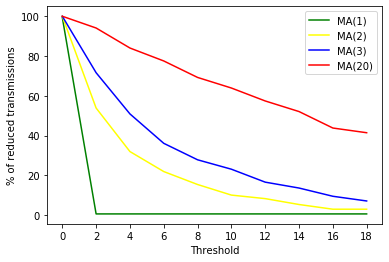

In [12]:
transmission_list = threshold_value(threshold)
plt.subplot(xlabel='Threshold', ylabel='% of reduced transmissions')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=transmission_list)

reduced_transmission_list = list()
reduced_transmission_list.append(reduced_transmission(dataset, moving_average_one, threshold))
reduced_transmission_list.append(reduced_transmission(dataset, moving_average_two, threshold))
reduced_transmission_list.append(reduced_transmission(dataset, moving_average_three, threshold))
reduced_transmission_list.append(reduced_transmission(dataset, moving_average_test, threshold))

plt.plot(reduced_transmission_list[0],color='green', label='MA(1)')
plt.plot(reduced_transmission_list[1],color='yellow', label='MA(2)')
plt.plot(reduced_transmission_list[2],color='blue', label='MA(3)')
plt.plot(reduced_transmission_list[3],color='red', label='MA(20)')
plt.legend(loc='best')
plt.show()